In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

## Reading of data

In [2]:
data = pd.read_csv("Combine food.csv",parse_dates=True)
data

,Date,Combined
0,2013-01-01,105.4
1,2013-02-01,106.4
2,2013-03-01,106.5
3,2013-04-01,107.5
4,2013-05-01,109.1
...,...,...
108,2022-01-01,164.9
109,2022-02-01,164.6
110,2022-03-01,166.9
111,2022-04-01,169.4


In [3]:
data.isna().sum()

Date        0
Combined    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      113 non-null    object 
 1   Combined  113 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [5]:
data["Date"] = pd.to_datetime(data["Date"])
data["Date"]

0     2013-01-01
1     2013-02-01
2     2013-03-01
3     2013-04-01
4     2013-05-01
         ...    
108   2022-01-01
109   2022-02-01
110   2022-03-01
111   2022-04-01
112   2022-05-01
Name: Date, Length: 113, dtype: datetime64[ns]

In [6]:
data

,Date,Combined
0,2013-01-01,105.4
1,2013-02-01,106.4
2,2013-03-01,106.5
3,2013-04-01,107.5
4,2013-05-01,109.1
...,...,...
108,2022-01-01,164.9
109,2022-02-01,164.6
110,2022-03-01,166.9
111,2022-04-01,169.4


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      113 non-null    datetime64[ns]
 1   Combined  113 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 KB


In [8]:
data.set_index("Date",inplace = True)

In [9]:
data   # calling date as an index

,Combined
Date,
2013-01-01,105.4
2013-02-01,106.4
2013-03-01,106.5
2013-04-01,107.5
2013-05-01,109.1
...,...
2022-01-01,164.9
2022-02-01,164.6
2022-03-01,166.9


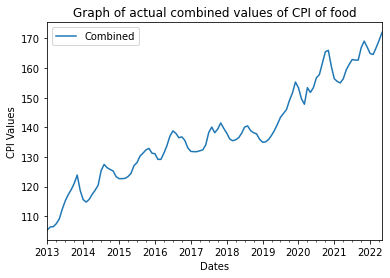

In [10]:
data.plot()
plt.title('Graph of actual combined values of CPI of food')
plt.xlabel('Dates')
plt.ylabel('CPI Values')
plt.show()

## Checking whether the data is stationary or not

In [11]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(data)
adftest

(0.37706757412774533,
 0.9806167968354379,
 7,
 105,
 {'1%': -3.4942202045135513,
  '5%': -2.889485291005291,
  '10%': -2.5816762131519275},
 395.0295766714674)

ADF: 1.123480477030908
p value:0.9954121199565441
no of lags: 10
no of obs used for ADF Regression and critical values calculation: 102
critical values: '1%': -3.4961490537199116,
  '5%': -2.8903209639580556,
  '10%': -2.5821223452518263

In [12]:
print(" pvalue of adfuller test is:", adftest[1])

 pvalue of adfuller test is: 0.9806167968354379


If p value <=0.05 then we reject null hypothesis(data is stationary)

here p-value is greater than 0.05 so we accept null hypothesis (data is not stationary) 

### To make data stationary

In [13]:
data["Combined first difference"]=data-data.shift(1)
data

,Combined,Combined first difference
Date,,
2013-01-01,105.4,NaN
2013-02-01,106.4,1.0
2013-03-01,106.5,0.1
2013-04-01,107.5,1.0
2013-05-01,109.1,1.6
...,...,...
2022-01-01,164.9,-2.2
2022-02-01,164.6,-0.3
2022-03-01,166.9,2.3


In [14]:
adftest = adfuller(data["Combined first difference"].dropna())
adftest

(-6.436538427475363,
 1.647505468469502e-08,
 6,
 105,
 {'1%': -3.4942202045135513,
  '5%': -2.889485291005291,
  '10%': -2.5816762131519275},
 390.3134579378321)

Now data is stationary

In [15]:
data["Combined 12 difference"] = data['Combined']-data['Combined'].shift(12)
data["Combined 12 difference"]

Date
2013-01-01     NaN
2013-02-01     NaN
2013-03-01     NaN
2013-04-01     NaN
2013-05-01     NaN
              ... 
2022-01-01     8.5
2022-02-01     9.1
2022-03-01    11.9
2022-04-01    13.0
2022-05-01    12.7
Name: Combined 12 difference, Length: 113, dtype: float64

## ACF and PACF Graph

In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

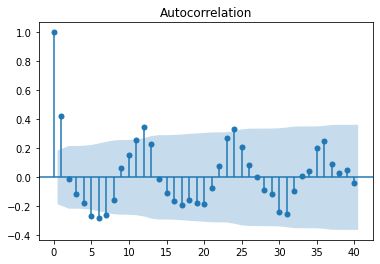

In [17]:
#fig = plt.figure(figsize=(12,8))
acf = plot_acf(data["Combined first difference"].dropna(),lags=40)

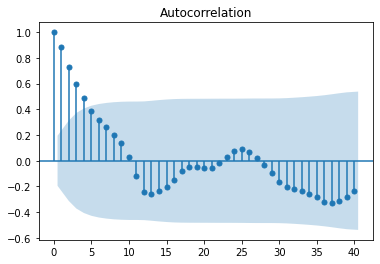

In [18]:
acf12 = plot_acf(data["Combined 12 difference"].dropna(),lags=40)

from acf12_second graph we get the value of q = 4

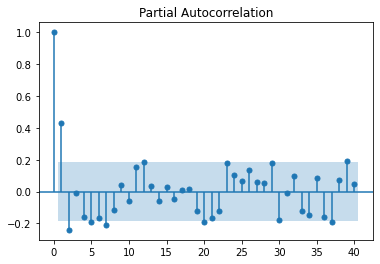

In [19]:
pacf = plot_pacf(data["Combined first difference"].dropna(),lags=40)

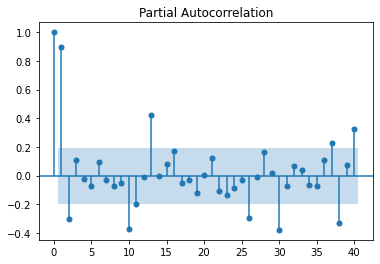

In [20]:
pacf12 = plot_pacf(data["Combined 12 difference"].dropna(),lags=40)

From PACF we get the value of p = 8

## Sarima model fitting

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [22]:
model_SARIMA = SARIMAX(data["Combined"],order=(2,1,1),seasonal_order = (2,0,1,12))

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [23]:
model_SARIMA_fit = model_SARIMA.fit()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Combined   No. Observations:                  113
Model:             SARIMAX(2, 1, 1)x(2, 0, 1, 12)   Log Likelihood                -212.006
Date:                            Fri, 26 Aug 2022   AIC                            438.012
Time:                                    14:38:17   BIC                            457.042
Sample:                                01-01-2013   HQIC                           445.733
                                     - 05-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6125      0.423      1.447      0.148      -0.217       1.442
ar.L2         -0.2775      0.144     -1.924      0.054      -0.560       0.005
ma.L1         -0.2551      0.424     -0.601      0.548      -1.086       0.576
ar.S.L12       0.9160      0.173      5.294      0.000       0.577       1.255
ar.S.L24       0.0825      0.145      0.567      0.571      -0.203       0.368
ma.S.L12      -0.9510      0.599     -1.589      0.112      -2.124       0.222
sigma2         2.1264      0.986      2.157      0.031       0.194       4.059
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                39.51
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.31   Skew:                             0.29
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Prediction of combined value

In [25]:
from datetime import datetime,timedelta
data['pred_Sarima'] = model_SARIMA_fit.predict(start = datetime(2013,1,1),end = datetime(2022,4,1))
data['pred_Sarima']


Date
2013-01-01      0.000000
2013-02-01    105.400133
2013-03-01    106.706288
2013-04-01    106.333554
2013-05-01    107.787625
                 ...    
2022-01-01    165.252252
2022-02-01    163.696198
2022-03-01    164.886917
2022-04-01    169.140378
2022-05-01           NaN
Name: pred_Sarima, Length: 113, dtype: float64

## Residuals

In [26]:
data['residuals'] = data["Combined"]-data['pred_Sarima']
data['residuals']

Date
2013-01-01    105.400000
2013-02-01      0.999867
2013-03-01     -0.206288
2013-04-01      1.166446
2013-05-01      1.312375
                 ...    
2022-01-01     -0.352252
2022-02-01      0.903802
2022-03-01      2.013083
2022-04-01      0.259622
2022-05-01           NaN
Name: residuals, Length: 113, dtype: float64

In [27]:
data

,Combined,Combined first difference,Combined 12 difference,pred_Sarima,residuals
Date,,,,,
2013-01-01,105.4,NaN,NaN,0.000000,105.400000
2013-02-01,106.4,1.0,NaN,105.400133,0.999867
2013-03-01,106.5,0.1,NaN,106.706288,-0.206288
2013-04-01,107.5,1.0,NaN,106.333554,1.166446
2013-05-01,109.1,1.6,NaN,107.787625,1.312375
...,...,...,...,...,...
2022-01-01,164.9,-2.2,8.5,165.252252,-0.352252
2022-02-01,164.6,-0.3,9.1,163.696198,0.903802
2022-03-01,166.9,2.3,11.9,164.886917,2.013083


<AxesSubplot:ylabel='Density'>

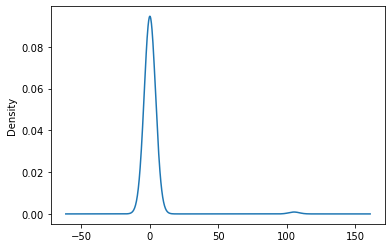

In [28]:
model_SARIMA_fit.resid.plot(kind = "kde")

In [29]:
from scipy import stats
stats.shapiro(data["residuals"])

ShapiroResult(statistic=nan, pvalue=1.0)

p value greater than 0.05 means accept null hypothesis. 

Our null hypothesis : data is from normal distribution 

here Our pvalue is 1.0

so residuals are normally distributed

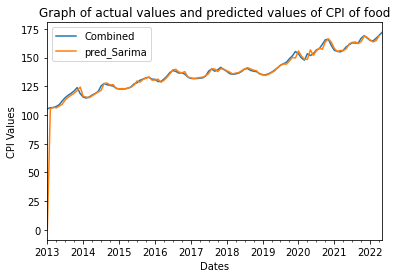

In [30]:
data[['Combined','pred_Sarima']].plot()
plt.title('Graph of actual values and predicted values of CPI of food')
plt.xlabel('Dates')
plt.ylabel('CPI Values')
plt.show()

#### Original dataset and our predicted values are nearby same

## Future prediction from May 2022 to May 2023

In [31]:
pred_Sarima2 = model_SARIMA_fit.predict(start = datetime(2022,5,1),end = datetime(2023,5,1))
pred_Sarima2

2022-05-01    170.186257
2022-06-01    174.351401
2022-07-01    176.472931
2022-08-01    177.264956
2022-09-01    177.365010
2022-10-01    178.595984
2022-11-01    179.319717
2022-12-01    177.560271
2023-01-01    176.086765
2023-02-01    175.243227
2023-03-01    175.153993
2023-04-01    176.605369
2023-05-01    177.674798
Freq: MS, Name: predicted_mean, dtype: float64

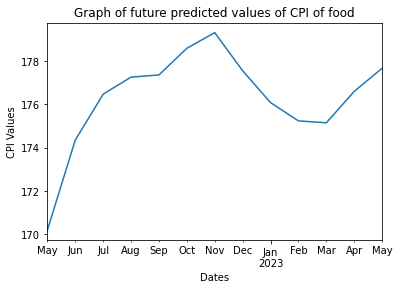

In [32]:
pred_Sarima2.plot()
plt.title('Graph of future predicted values of CPI of food')
plt.xlabel('Dates')
plt.ylabel('CPI Values')
plt.show()